In [78]:
### load data from torch file. Unncessary if .npy files containing the IG is already done
#import torch
# Mason
#pt = torch.load('mason_unique_results.pt', map_location='cpu').numpy()
#labels = torch.load('mason_unique_label.pt', map_location='cpu').numpy()
#sequ = torch.load('mason_unique_sequence.pt', map_location='cpu').numpy()

# Brij
#pt = torch.load('brij_short_results.pt', map_location='cpu').numpy()
#labels = torch.load('brij_short_label.pt', map_location='cpu').numpy()
#sequ = torch.load('brij_short_sequence.pt', map_location='cpu').numpy()

pt = torch.load('mason_unique_results.pt', map_location='cpu').numpy()
pt should be the same as your masonIG (probably a npy file and not a csv?)

labels = torch.load('mason_unique_label.pt', map_location='cpu').numpy()
labels should be a number with either 1 or 0, and should be in the mason_sequences_labeled.csv' file


sequ = torch.load('mason_unique_sequence.pt', map_location='cpu').numpy()
are the sequences them self and are also in the mason_sequences_labeled.csv' file. However in my code they are a one-hot encoded numpy tensor, while you already have the complete sequences. You dont need the one-hot encoding, so you need to remove the code that transforms the one-hot encoding into a string

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.path import Path
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import seaborn as sns
#import logomaker #only to make a logo graph

# Load Integrated Gradients (IG) labels and sequences into separate numpy arrays

In [80]:
### Load data from numpy files
###Takes IG data from xyzIG.npy file and seq + label data from xyz_sequences_label.csv file


#Mason
ig_data =r"/Users/isaacdaviet/Desktop/mason_igfold_models/masonIG.npy"
labeled_seq_data = r"/Users/isaacdaviet/Desktop/mason_igfold_models/mason_sequences_label.csv"

labeled_seq_data = pd.read_csv(labeled_seq_data)

pt = np.load(ig_data) #load Ig data

labels = labeled_seq_data.iloc[:,1].to_numpy()
labels = np.array(labels)

sequ = labeled_seq_data.iloc[:,0].to_numpy()
sequ = np.array(sequ)

# PCA Analysis

## PCA Computing and 2D Graphing

In [125]:
def compute_pca(pc_no):
    '''
    Computes PCA based on number of principle components provided
    '''
    pca = PCA(n_components=pc_no)
    return pca


def pca_transformation(pt, pca, pc1, pc2):
    pca_transf = pca.fit_transform(pt.reshape(-1, 20*10))
    pca_transf = pca_transf[:, [pc1-1, pc2-1]]
    return pca_transf

    
def graph_pca(pt, labels, sequ, pc1, pc2, pca, show_points = None):
    '''
    Graphs PCA using IG, label and sequence numpy arrays based on selected principle components and the resulting 
    PCA transformation from the pca_transform function.
    
    
    Also returns list of rows containing binders/non-binders in separate lists for further use
    '''
    
    pca_transf = pca_transformation(pt, pca, pc1, pc2)
    
    x_axes = f'PCA{pc1} explained variance: {pca.explained_variance_ratio_[pc1-1]*100:.2f}%'
    y_axes = f'PCA{pc2} explained variance: {pca.explained_variance_ratio_[pc2-1]*100:.2f}%'

    X = pd.DataFrame(pca_transf, columns = [x_axes, y_axes])
    X['Labels'] = pd.DataFrame(labels, columns=['Labels'])['Labels'].apply(lambda x: 'Binder' if x > 0.5 else 'Non Binder')

    if show_points == 'binders':
        X = X[X['Labels'] == 'Binder']

    elif show_points == 'non binders':
        X = X[X['Labels'] == 'Binder']

    #plt.figure(figsize = (20,15))

    ax = sns.scatterplot(x=x_axes, y=y_axes, data=X, linewidth=0, hue='Labels', s=5)
    #ax = sns.scatterplot(x=x_axes, y=y_axes, data=x_nb, linewidth=0, s=5)

    # ax.set_axis_off()
    ax.set_frame_on(False)
    # plt.title('PCA on Integraded Gradients for sequences with implanted signals')
    plt.show()
    
    binders = X.index[X['Labels'] == 'Binder'].tolist()
    nonbinders = X.index[X['Labels'] == 'Non Binder'].tolist()
    
    return binders, nonbinders, X

    
def compute_and_graph_pca(pt, labels, sequ, pc1, pc2, show_binders= None):
    '''
    Performs all computation steps of the PCA analysis according to the set principle components using the
    IG, labels and sequence data
    '''
        
    pca = compute_pca(pc2)
    pca_transformat = pca_transformation(pt, pca, pc1, pc2)
    
    binders_and_nonbinders = graph_pca(pt, labels, sequ, pc1, pc2, pca, show_binders)
    return binders_and_nonbinders



def show_all_pc_combos(pt, labels, sequ, pc_no, show_binders=None):
    '''
    Computes and graphs all possible principle component combinations for the set pc number based on IG, label, 
    sequence.
    
    Only for quick investigation purposes. Does not return anything
    '''
    combos = []
    pca = compute_pca(pc_no)
    
    for i in range(1, pc_no+1):
        for j in range (1, pc_no+1):
            if i !=j and (i,j) not in combos and (j,i) not in combos:
                combos.append((i,j))
                compute_and_graph_pca(pt, labels, sequ, i, j, show_binders)



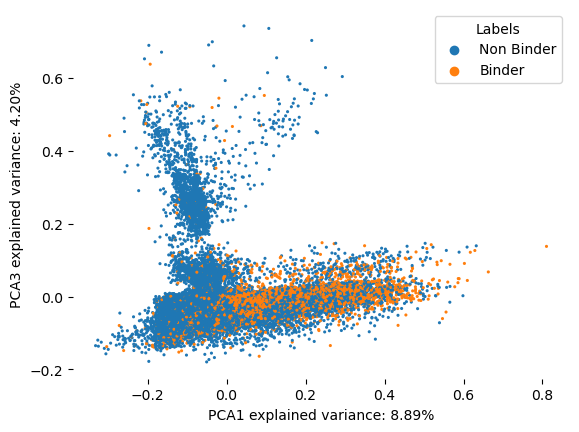

In [126]:
pca = compute_pca(10)
pca_transf = pca_transformation(pt, pca, 1, 2)
bvnb = graph_pca(pt, labels, sequ, 1, 3, pca)
# compute_and_graph_pca(pt, labels, sequ, 2, 3)
# show_all_pc_combos(pt, labels, sequ, 3)

## PCA Explained Variance Bar Plot

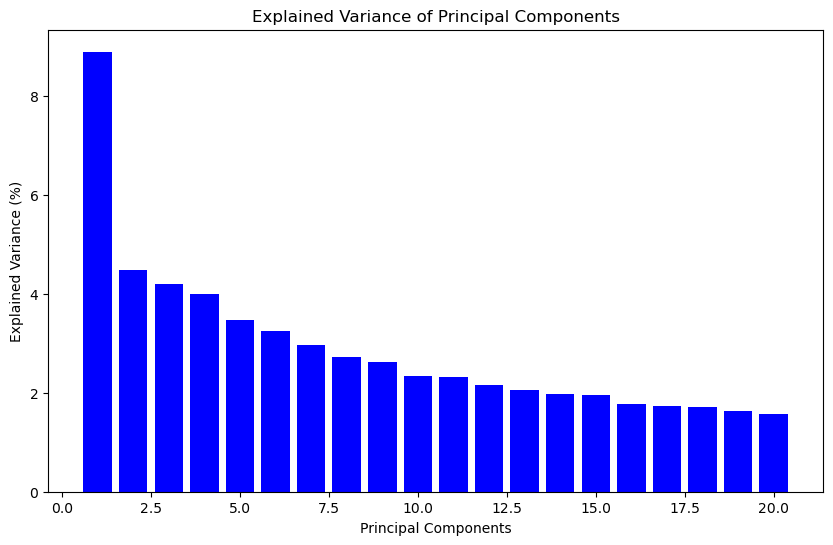

In [132]:
def pca_explained_variance_bar_plot(pt,n_components = 20):
    pca = compute_pca(n_components)
    pca_transf = pca_transformation(pt, pca, 1, n_components)

    exp_var = [round(ev * 100, 2) for ev in pca.explained_variance_ratio_]

    # Bar plot for explained variance
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, n_components + 1), exp_var, color='blue')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance (%)')
    plt.title('Explained Variance of Principal Components')
    plt.show()

pca_explained_variance_bar_plot(pt)

## 3-D PCA graphing

In [83]:
# pip install plotly

In [84]:
import plotly.graph_objects as go
from scipy.spatial import ConvexHull

In [121]:
def graphing_3d_pca(pt, labels, sequ, pc1, pc2, pc3, show_points = None):
        
    pca = compute_pca(pc3)
    pca_transf = pca.fit_transform(pt.reshape(-1, 20*10))
    pca_transf = pca_transf[:, [pc1-1, pc2-1, pc3-1]]

    x_axes = f'PCA{pc1} expl var: {pca.explained_variance_ratio_[pc1-1]*100:.2f}%'
    y_axes = f'PCA{pc2} expl var: {pca.explained_variance_ratio_[pc2-1]*100:.2f}%'
    z_axes = f'PCA{pc3} expl var: {pca.explained_variance_ratio_[pc3-1]*100:.2f}%'

    X = pd.DataFrame(pca_transf, columns = [x_axes, y_axes, z_axes])
    X['Labels'] = pd.DataFrame(labels, columns=['Labels'])['Labels'].apply(lambda x: 'Binder' if x > 0.5 else 'Non Binder')

    if show_points == 'binders':
        X = X[X['Labels'] == 'Binder']

    elif show_points == 'non binders':
        X = X[X['Labels'] == 'Non Binder']

    # Create a 3D scatter plot with Plotly
    fig = go.Figure(data=[
        go.Scatter3d(
            x=X[x_axes],
            y=X[y_axes],
            z=X[z_axes],
            mode='markers',
            marker=dict(
                size=2,
                color=X['Labels'].map({'Binder': 'red', 'Non Binder': 'blue'}),
                opacity=0.5
            )
        )
    ])

    # Set labels for each axis
    fig.update_layout(scene=dict(xaxis_title=x_axes, yaxis_title=y_axes, zaxis_title=z_axes))
    fig.update_layout(width=800, height=400)

    # Show the interactive plot
    fig.show()

graphing_3d_pca(pt, labels, sequ, 1, 2, 3, show_points = 'binders')
    

def show_all_pc_combos_3d(pt, labels, sequ, pc_no, show_points = None):
    combos = set()
    pca = compute_pca(pc_no)
    
    for i in range(1, pc_no+1):
        for j in range (1, pc_no+1):
            for k in range (1, pc_no+1):
                if i !=j and i != k and j != k: 
                    current_combo = frozenset({i, j, k}) 

                    if current_combo not in combos:
                        combos.add(current_combo)
                        graphing_3d(pt, labels, sequ, i, j, k, 'binders')

# show_all_pc_combos_3d(pt, labels, sequ, 10, show_points = None)


## Extracting all data points from a given set of vertices

### Example 2D vertices provided by Robert

In [87]:
### Vertices provided by Robert as examples

#-0.0370, 0.0512#bottom right
#-0.1263, 0.1838#bottom left
#-0.0051, 0.1493#top right
#-0.0779, 0.2759#top left

# Mason negative extract
vertices_1 = np.asarray([(-0.1263, 0.1838),#bottom left
                       (-0.0370, 0.0512),#bottom right
                       (-0.0051, 0.1493),#top right
                       (-0.0779, 0.2759)])#top left

# Mason spike right down extract
vertices_2 = np.asarray([(-0.0735, -0.096),#bottom left
                       (0.1508, -0.425),#bottom right
                       (0.2074, -0.312),#top right
                       (0.0211, -0.04)])#top left


# Mason spike right down up
vertices_3 = np.asarray([(0.0484, -0.008),#bottom left
                       (0.3635, 0.15),#bottom right
                       (0.3703, 0.295),#top right
                       (0.0513, 0.121)])#top left

# Brij spike down
vertices_4 = np.asarray([(0.0578, -0.045),#bottom left
                       (0.5968, 0.029),#bottom right
                       (0.5942, 0.098),#top right
                       (0.0628, 0.009)])#top left


# Brij spike vertical 1
vertices_5 = np.asarray([(-0.0263, 0.089),#bottom left
                       (-0.0056, 0.093),#bottom right
                       (-0.0784, 0.604),#top right
                       (-0.0997, 0.588)])#top left

# Brij spike diagonal
vertices_6 = np.asarray([(0.1356, 0.127),#bottom left
                       (0.2887, 0.264),#bottom right
                       (0.2648, 0.298),#top right
                       (0.1256, 0.147)])#top left

vertices_selection = [vertices_1, vertices_2, vertices_3, vertices_4,vertices_5,vertices_6]

### Function to extract PCA rows/positions of the data points from 2D graph

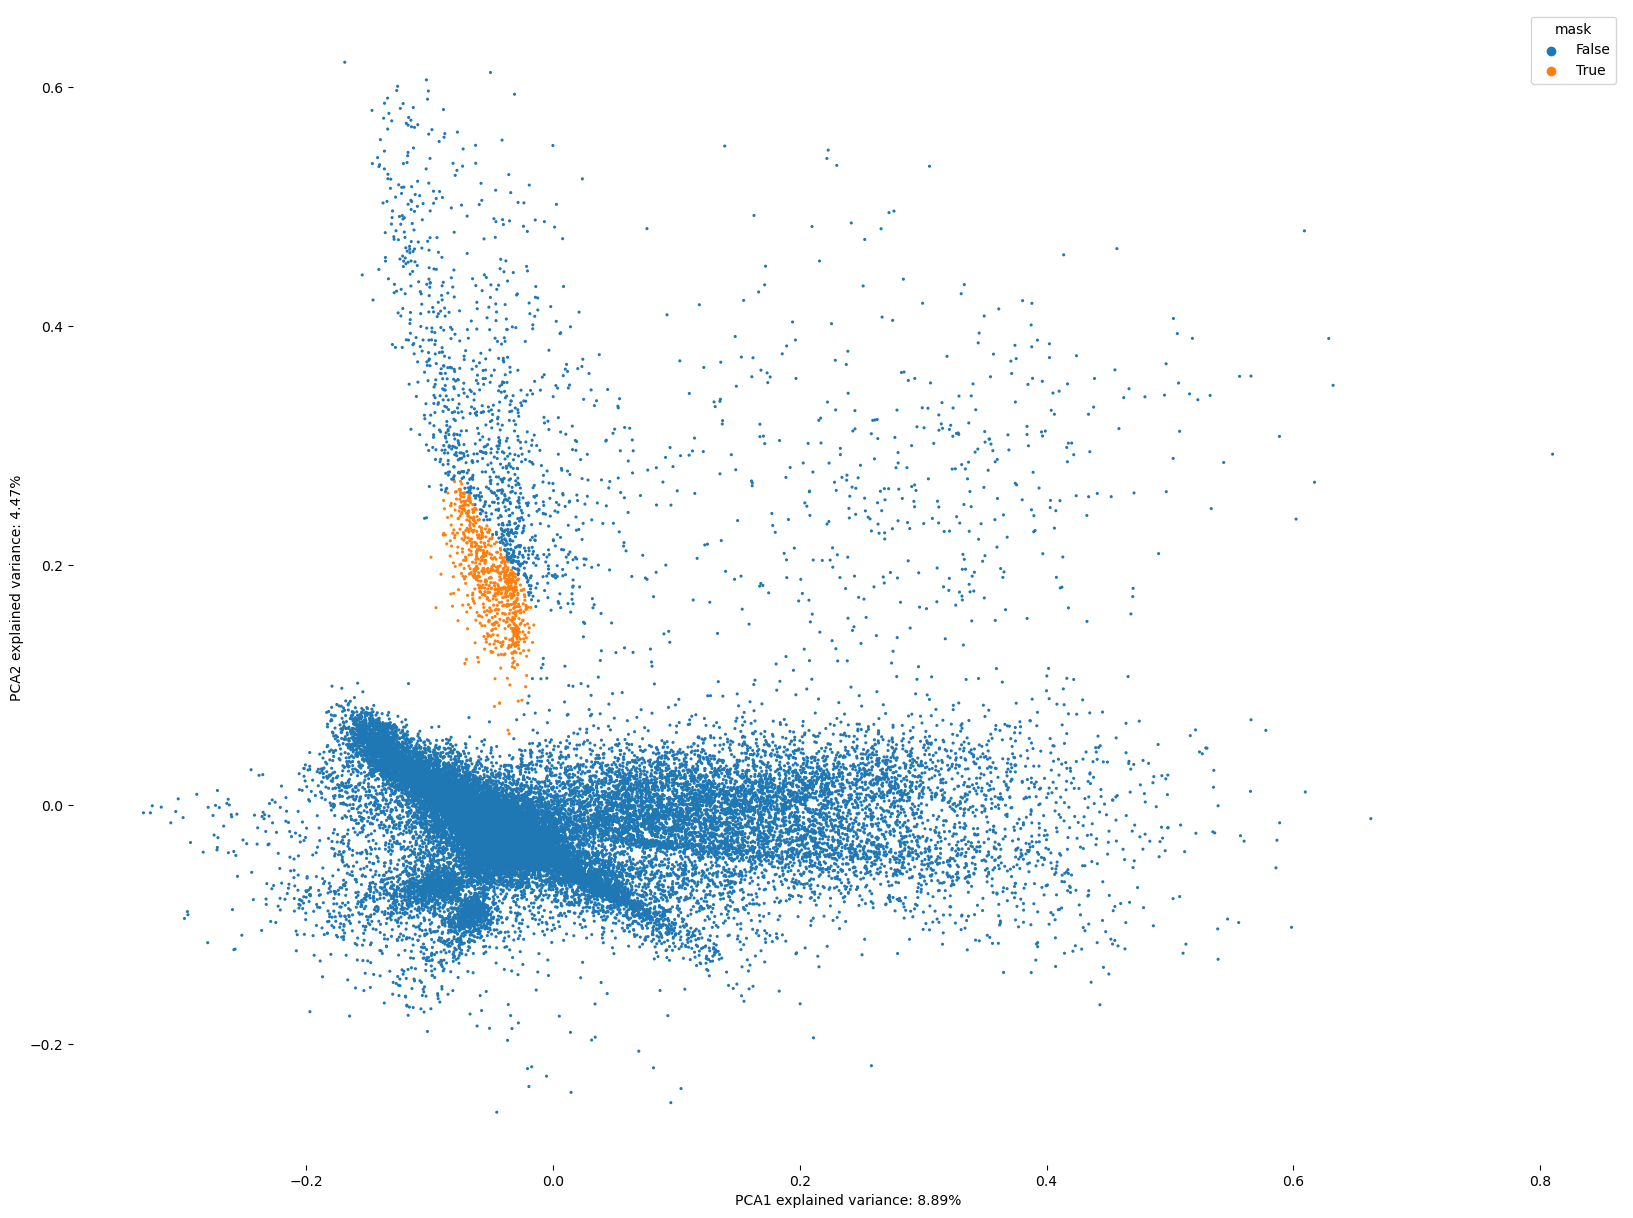

Number of Points Selected: 719    --    Number of Binders: 23    --    Number of Non Binders: 696


In [86]:
### ploting selection captured in vertices
def pca_selection(pt, labels, vertices, pc1, pc2, show_graph = None):
    """
    Returns the positions of the IG sequences entries that fall within the selected vertices
    Resulting list can be of all CDRH3 located within the vertices or just the binders/non-binders
    Also returns the final complete array for QC purposes
    
    Final 'show_graph' input can be left blank, or input 'y' or 'yes' to show the resulting graph and selected points
    
    Returned selection to be used in next functions to extract and convert the sequences to one letter amino acid code
    """
    pca = compute_pca(pc2)
    pca_transf = pca_transformation(pt, pca, pc1, pc2)

    hull = ConvexHull(vertices)
    vertices = vertices[hull.vertices]
    
    path = Path(vertices)
    mask = path.contains_points(pca_transf)
    
    
    x_axes = f'PCA{pc1} explained variance: {pca.explained_variance_ratio_[pc1-1]*100:.2f}%'
    y_axes = f'PCA{pc2} explained variance: {pca.explained_variance_ratio_[pc2-1]*100:.2f}%'
    
    X = pd.DataFrame(pca_transf, columns = [x_axes, y_axes])
    X['Labels'] = pd.DataFrame(labels, columns=['Labels'])['Labels'].apply(lambda x: 'Binder' if x > 0.5 else 'Non Binder')

    X['mask'] = mask
    
    if show_graph == 'y' or show_graph == 'yes': 
        plt.figure(figsize = (20,15))
        ax = sns.scatterplot(x=x_axes, y=y_axes, data=X, linewidth=0, hue='mask', s=5)
        ax.set_frame_on(False)
        plt.show()
        
    all_rows = [int(i) for i in X.index[mask]]
    binder_rows = [int(i) for i in X.index[mask] if X.loc[i, 'Labels'] == 'Binder']
    nonbinder_rows = [int(i) for i in X.index[mask] if X.loc[i, 'Labels'] == 'Non Binder']
    
    print(f'Number of Points Selected: {len(all_rows)}    --    Number of Binders: {len(binder_rows)}    --    Number of Non Binders: {len(nonbinder_rows)}')
    
    return all_rows, binder_rows, nonbinder_rows, X 
  
all_rows, selected_binders, selected_nonbinders, xarray = pca_selection(pt, labels, vertices_1, 1, 2, show_graph = 'y')


### Extracting data points from a 3D PCA graph
Completed but not tested. Difficult to figure out the 3D vertices. Might be more useful as an exploratory tool rather than a data extraction tool

In [ ]:
vertices_cube = np.array([
    (0, 0, 0),   # Vertex 1: bottom front left
    (0, 0, 0),   # Vertex 2: bottom front right
    (0, 0, 0),   # Vertex 3: bottom back right
    (0, 0, 0),   # Vertex 4: bottom back left
    (0, 0, 0),   # Vertex 5: top front left
    (0, 0, 0),   # Vertex 6: top front right
    (0, 0, 0),   # Vertex 7: top back right
    (0, 0, 0)])    # Vertex 8: top back left

def extract_3d_pca(pt, labels, sequ, pc1, pc2, pc3, vertices, show_points=None):
        
    # Compute PCA and transform the data
    pca = compute_pca(pc3)
    pca_transf = pca.fit_transform(pt.reshape(-1, 20*10))
    pca_transf = pca_transf[:, [pc1-1, pc2-1, pc3-1]]

    # Create axis labels
    x_axes = f'PCA{pc1} expl var: {pca.explained_variance_ratio_[pc1-1]*100:.2f}%'
    y_axes = f'PCA{pc2} expl var: {pca.explained_variance_ratio_[pc2-1]*100:.2f}%'
    z_axes = f'PCA{pc3} expl var: {pca.explained_variance_ratio_[pc3-1]*100:.2f}%'

    # Create a Convex Hull using provided vertices
    hull = ConvexHull(vertices)
    vertices = vertices[hull.vertices]

    # Create a path to check points within the Convex Hull
    path = Path(vertices)
    mask = path.contains_points(pca_transf)

    # Create a DataFrame with PCA-transformed data, labels, and mask
    X = pd.DataFrame(pca_transf, columns=[x_axes, y_axes, z_axes])
    X['Labels'] = pd.DataFrame(labels, columns=['Labels'])['Labels'].apply(lambda x: 'Binder' if x > 0.5 else 'Non Binder')
    X['mask'] = mask

    # Filter points based on the 'show_points' parameter
    if show_points == 'binders':
        X = X[X['Labels'] == 'Binder']
    elif show_points == 'non binders':
        X = X[X['Labels'] == 'Non Binder']

    # Create a 3D scatter plot with Plotly
    fig = go.Figure(data=[
        go.Scatter3d(
            x=X[x_axes],
            y=X[y_axes],
            z=X[z_axes],
            mode='markers',
            marker=dict(
                size=2,
                color=X['mask'].map({True: 'red', False: 'blue'}),
                opacity=0.5
            )
        )
    ])

    # Set labels for each axis
    fig.update_layout(scene=dict(xaxis_title=x_axes, yaxis_title=y_axes, zaxis_title=z_axes))
    fig.update_layout(width=1200, height=800)

    # Show the interactive plot
    fig.show()

# Example usage:
# extract_3d_pca(pt, labels, sequ, 1, 2, 3, vertices, show_points=None)
# extract_3d_pca(pt, labels, sequ, 1, 2, 3, vertices, show_points='binders')
# extract_3d_pca(pt, labels, sequ, 1, 2, 3, vertices, show_points='non binders')


# UMAP Reduction

### Setup/Imports

In [88]:
#pip install umap-learn

In [89]:
###imports required for proper functioning of UMAP code
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from scipy.spatial import ConvexHull

### UMAP calculations

In [90]:
def flatten_labeled_data(unlabeled_data, labels):
    """
    Flatten the unlabeled IG data and combine it with labels.

    Parameters:
    - unlabeled_data (numpy.ndarray): Input data to be flattened.
    - labels (numpy.ndarray): Labels corresponding to the input data.

    Returns:
    pandas.DataFrame: DataFrame containing flattened data with feature names and labels.
    """
    
    flattened_data = unlabeled_data.reshape(unlabeled_data.shape[0], -1)
    columns = [f'Feature-{i}' for i in range(1, flattened_data.shape[1] + 1)]
    umap_df = pd.DataFrame(flattened_data, columns=columns)
    umap_df['Labels'] = pd.DataFrame(labels, columns=['Labels'])['Labels'].apply(lambda x: 'Binder' if x > 0.5 else 'Non Binder')
    return umap_df

# umap_df = flatten_labeled_data(pt, labels)
# print(umap_df.head)

In [108]:
def umap_reduction(umap_df, n_components=2, n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42):
    """
    Perform UMAP dimensionality reduction on the input DataFrame.

    Parameters:
    - umap_df (pandas.DataFrame): DataFrame containing flattened data and labels.
    - n_components (int): Number of components for the reduced representation.
    - n_neighbors (int): Number of neighbors to consider during UMAP construction.
    - min_dist (float): Minimum distance between points in the reduced space.
    - metric (str): Distance metric to use for UMAP.
    - random_state (int): Seed for reproducibility.

    Returns:
    pandas.DataFrame: DataFrame containing the UMAP-reduced data with labels.
    """

    reducer = umap.UMAP(
        n_components=n_components,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        random_state=random_state
    )

    umap_result = reducer.fit_transform(umap_df.iloc[:, :-1])  # Assuming the last column is 'Labels'

    umap_result = pd.DataFrame(umap_result, columns=[f'UMAP-{i+1}' for i in range(n_components)])

    labels = pd.DataFrame(umap_df['Labels'], columns=['Labels'])

    umap_result = pd.concat([umap_result, labels], axis = 1)

    return umap_result


umap_result = umap_reduction(umap_df)
# print(umap_result.head)

/Users/isaacdaviet/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



### 2D & 3D UMAP Plotting

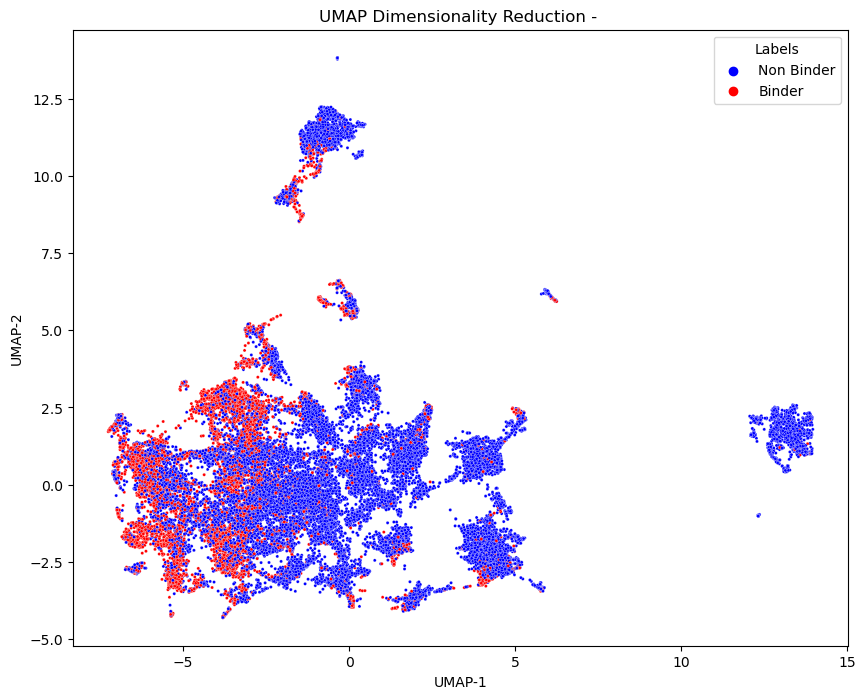

In [101]:
def plot_2d_umap(umap_result, show_binders=None):
    """
    Plot 2D UMAP representation with optional filtering based on binders/non-binders.

    Parameters:
    - umap_result (pandas.DataFrame): DataFrame containing UMAP-reduced data with labels.
    - show_binders (str): Filter option for 'binders' or 'non-binders'.

    Returns:
    None, only prints 2d plot
    """
    
    plt.figure(figsize=(10, 8))

    if show_binders == 'binders':
        binders_color, non_binders_color = 'blue', 'white'
        title_ext = ' - BINDERS ONLY'
    elif show_binders == 'non-binders':
        binders_color, non_binders_color = 'white', 'blue'
        title_ext = ' - NON BINDERS ONLY'
    else:
        binders_color, non_binders_color = 'red', 'blue'
        title_ext = ''

    sns.scatterplot(x='UMAP-1', y='UMAP-2', hue='Labels', data=umap_result, palette={'Binder': binders_color, 'Non Binder': non_binders_color}, s=5)

    plt.title(f'UMAP Dimensionality Reduction - {title_ext}')
    plt.show()

plot_2d_umap(umap_result)
# plot_2d_umap(umap_result, show_binders = 'binders')
# plot_2d_umap(umap_result, show_binders = 'non-binders')

In [93]:
def plot_3d_umap(umap_result, show_binders = None, graph_size=(1000, 700), point_size=5):
    """
    Plot 3D UMAP representation with optional filtering based on binders/non-binders.

    Parameters:
    - umap_result (pandas.DataFrame): DataFrame containing 3D UMAP-reduced data with labels.
    - show_binders (str): Filter option for 'binders' or 'non-binders'.
    - graph_size (tuple): Size of the plot in pixels.
    - point_size (int): Size of the markers in the plot.

    Returns:
    None
    """

    binders_color = 'red'
    non_binders_color = 'blue'

    if show_binders == 'binders':
        binders_opacity, non_binders_opacity = 1.0, 0.0
        title_ext = ' - BINDERS ONLY'
    elif show_binders == 'non-binders':
        binders_opacity, non_binders_opacity = 0.0, 1.0
        title_ext = ' - NON BINDERS ONLY'
    else:
        binders_opacity, non_binders_opacity = 1.0, 1.0
        title_ext = ''

    fig = go.Figure()


    for label, color, opacity in [('Binder', binders_color, binders_opacity), ('Non Binder', non_binders_color, non_binders_opacity)]:
        subset = umap_result[umap_result['Labels'] == label]
        fig.add_trace(go.Scatter3d(
            x=subset['UMAP-1'],
            y=subset['UMAP-2'],
            z=subset['UMAP-3'],
            mode='markers',
            marker=dict(size=point_size, color=color),
            opacity=opacity,
            name=label
        ))

    # Update layout for better visualization
    fig.update_layout(
        title=f'3D UMAP Dimensionality Reduction{title_ext}',
        scene=dict(
            xaxis_title='UMAP-1',
            yaxis_title='UMAP-2',
            zaxis_title='UMAP-3'
        ),
        width=graph_size[0],
        height=graph_size[1]
    )

    fig.show()



# umap_3d_default = umap_reduction(umap_df, n_components = 3)
# plot_3d_umap(umap_3d_default, point_size = 2)
# plot_3d_umap(umap_3d_default, point_size = 2)


### Exctracting Data Points from 2D UMAP graph

In [113]:
# test_vertices = np.asarray([(10, 0),#bottom left
#                        (15, 0),#bottom right
#                        (10, 2.5),#top right
#                        (15, 2.5)])#top left

test_vertices = np.asarray([(-2.5, 7.5),#bottom left
                       (2.5, 7.5),#bottom right
                       (-2.5, 13),#top right
                       (2.5, 13)])#top left


def umap_selection_2d(umap_result, vertices, show_graph=None):

    hull = ConvexHull(vertices)
    vertices = vertices[hull.vertices]

    path = Path(vertices)
    points = umap_result[['UMAP-1', 'UMAP-2']].values
    mask = path.contains_points(points)

    umap_result['mask'] = mask
    
    if show_graph == 'y' or show_graph == 'yes':
        plt.figure(figsize=(10, 8))

        ax = sns.scatterplot(x='UMAP-1', y='UMAP-2', hue='mask', data=umap_result, s=10)

        # ax.set_frame_on(False)

        plt.title(f'UMAP Dimensionality Reduction - Selected Points')
        plt.show()

    all_selected = [i for i in umap_result.index[mask]]
    binder_rows = [i for i in umap_result.index[mask] if umap_result.loc[i, 'Labels'] == 'Binder']
    nonbinder_rows = [i for i in umap_result.index[mask] if umap_result.loc[i, 'Labels'] == 'Non Binder']

    print(f'Number of Points Selected: {len(all_selected)}    --    Number of Binders: {len(binder_rows)}    --    Number of Non Binders: {len(nonbinder_rows)}')

    return all_selected, binder_rows, nonbinder_rows, umap_result


all_selected, binders, non_binders, umap_resfults_df = umap_selection_2d(umap_result, test_vertices)

# umap_selection_2d(umap_result, test_vertices, show_binders = 'binders')
# umap_selection_2d(umap_result, test_vertices, show_binders = 'non-binders')

Number of Points Selected: 2380    --    Number of Binders: 423    --    Number of Non Binders: 1957


# Functions to convert IG 1-hot encoded sequences from selection of row positions

In [118]:
def one_hot_to_one_letter(integrated_gradient_sequence):
    '''
    Function to convert one-hot encoded sequence to one-letter amino acid sequence string.
    '''
    amino_acids = "ACDEFGHIKLMNPQRSTVWY"
    one_letter_code = ""
    
    for block in integrated_gradient_sequence:
        index = next((i for i, value in enumerate(block) if np.any(value != 0)), -1)
        if index != -1:
            one_letter_code += amino_acids[index]
        else:
            one_letter_code += "X"  # Placeholder for unknown or padding

    return one_letter_code



def onehot_to_oneletter_selection(selection):
    '''
    Returns one-letter amino acid sequence of entries, using a list of selected rows as input
    
    Can be used as an extension of graph_pca, compute_and_graph_pca and pca_selection
    '''
    selected_cdrh3_seqs = []

    for row in selection:
        ig_entry = pt[row]
        aa_seq = one_hot_to_one_letter(ig_entry)
        selected_cdrh3_seqs.append(aa_seq)
    
    return selected_cdrh3_seqs
    
print(onehot_to_oneletter_selection(binders))

['WRDCGFYEFG', 'WSGAGFYEFA', 'WGAHGFYELD', 'YNKCGFYEFR', 'WHRCSFYEFD', 'YMAISFYELD', 'FILLAFFEFS', 'WGQGNYFEIA', 'YRLSGFYELD', 'FRPLGFYELQ', 'WPKSSFYELD', 'WMVSSFYEFK', 'WLNFGLFEFT', 'YSGVSFYELT', 'WAGIGFYEFN', 'WGSRGFYEFA', 'FTNRHSFEFK', 'WGLVSFYEYD', 'WARFGLYEFD', 'FGLTGFYEFQ', 'WHLRSFYEFD', 'WRVAAFFELV', 'WGLVGFYELV', 'WRLDGFYEND', 'WSVTSMYEFV', 'WAALGLFENV', 'WRGSGMYEFI', 'WRAHGFYEFV', 'WAAPSFYEHA', 'WRQVAMFENL', 'FGMYSFYELV', 'WGDAGMYEFD', 'YGAVAMYELV', 'WNVAGLYEFR', 'WLGDGFYEFA', 'WRTPGFYEFV', 'WHAAGLYEFI', 'WIGNGMYEFL', 'YHANAFFELA', 'WHGGGFYEFA', 'YVECGLYEHH', 'WRVFGMFEYC', 'WRGCGFYEYD', 'WPVSDFYEFE', 'WRIIGLYEFD', 'WGQVGFYELT', 'WANHGLFEYD', 'YSNCRFFELD', 'WPGNGFYEYD', 'YLHLGMYEYD', 'YGEIGFYEND', 'WREGGFYEYE', 'FVGCGFYEFG', 'FGDFSFYEFT', 'WGGCAFFEFS', 'FRGPGMYEYA', 'YGDHSFYEFK', 'WALSGFYEFD', 'WQVHGFYEYD', 'YLAFGFYEFD', 'WSQYDYYEFR', 'YITVGFYEYD', 'WSSYGFYELA', 'WIAAGFYELA', 'WRNVSFYEFV', 'FLTFGFYEYA', 'WDMFAFFEFA', 'YALVGLYEFG', 'WTVDGLYEYD', 'WIIPGMYEFD', 'WDVPGFFEFA', 'YTPV

### Function to iterate through list of vertices and export the resulting list into separate txt files